# About Dataset

Zomato is an Indian multinational restaurant aggregator and food delivery company founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in select cities

* This dataset containing information of food restraunts in banglaore who are working with Zomato.The data was scraped from Zomato in two phase. After going through the structure of the website.


* I found for each neighborhood there are 6-7 category of restaurants viz. Buffet, Cafes, Delivery, Desserts, Dine-out, Drinks & nightlife, Pubs and bars. So, here we are trying to find the best restaurants for customer depends on their need.

# My Findings

1) How many restaurants accpeting online order for zomato? 

2) Find best location by seeing dataset. 

3) Find Types of restraunts and their count.

4) Find count of restaurants have table boking facility.

5) Find number of restaurant at given location.

6) Find most famous restaurants chains(like Franchise(Rastaurants having more than one branch) in Bangalore.

7) Find how many voters gives rating for each 'type' and aggregate rating of that 'type'.

8) Gaussian Rest Type(Normal Distribution) of Rating.

9) Find the how many Restaurants havign Chinese and North Indian food in their food type.

10) Most famous restaurant chains in Bengaluru(No. of restaurants)

11) Find the most profitable type of restaurant.


## Exploratory Analysis

To begin this exploratory analysis, first to import libraries and define functions for plotting the data. Depending on the data, not all plots will be made.

## Process of Data Cleaning
First we are trying to clean our data for the better results.

## Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np   # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import re    # regex pattern matching
import warnings
warnings.filterwarnings('ignore') # Ignoring warnings


### Reading Dataset

In [2]:
zmt = pd.read_csv("zomato.csv")

In [3]:
zmt.head()  # Reading 1st Five rows of our dataset using .head(). Reading bottom Five rows of our dataset using .tail().

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
zmt.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [5]:
zmt.shape

(51717, 17)

In [6]:
zmt.info() #checking information of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Here we can see we are having 17 columns and some columns including NaN values and incorrect data_types.

Ex: approx_cost(for two people) and phone column has integer values but having object data_type.

In [7]:
zmt.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

## Droping Unnecessary Columns

Unnecessary columns are those columns which are not that useful for analysis.

Ex: Phone_Number, we not able to predict anything using Phone numbers. So, we can drop that columns which we are not going to use.

In [8]:
zmt.drop(['url','reviews_list','menu_item','address','phone','dish_liked'],axis=1,inplace=True)

In [9]:
zmt.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari


### Renaming Columns
We are renaming the columns for better readability.

In [10]:
zmt.rename(columns={'name':'restaurants','rate':'rating','cuisines':'food_type','listed_in(type)':'type','listed_in(city)':'city','approx_cost(for two people)':'cost'},inplace=True)

In [11]:
zmt.head(3)

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari


### Droping NaN values¶

Droping NaN values for better result using dropna()

In [12]:
zmt.dropna(inplace = True) 

In [13]:
zmt.isnull().values.any()

False

In [14]:
zmt.shape

(43533, 11)

In [15]:
zmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43533 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   restaurants   43533 non-null  object
 1   online_order  43533 non-null  object
 2   book_table    43533 non-null  object
 3   rating        43533 non-null  object
 4   votes         43533 non-null  int64 
 5   location      43533 non-null  object
 6   rest_type     43533 non-null  object
 7   food_type     43533 non-null  object
 8   cost          43533 non-null  object
 9   type          43533 non-null  object
 10  city          43533 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.0+ MB


## Cleaning Individual Columns

#### Column : 'restaurants'
Column contains Restaurant Names

In [16]:
zmt.groupby('restaurants').count().head() # we are grouping the restaurants to see the restaurant names and their count.

,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
restaurants,,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2,2
#L-81 Cafe,9,9,9,9,9,9,9,9,9,9
#refuel,3,3,3,3,3,3,3,3,3,3
1000 B.C,6,6,6,6,6,6,6,6,6,6
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3,3,3,3,3,3,3,3,3,3


Here we can see we are got restaurant names having disturbed characters

so we need to remove that characters from the name using pattern matcing to get orignal names.

In [17]:
# '[Ãx][^A-Za-z]+' pattern I got to find disturbed characters using regex. And Replacing those charachters with empty space.

zmt['restaurants']=zmt['restaurants'].str.replace('[Ãx][^A-Za-z]+',' ',regex=True)

In [18]:
zmt.groupby('restaurants').count().head()

,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
restaurants,,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2,2
#L-81 Cafe,9,9,9,9,9,9,9,9,9,9
#refuel,3,3,3,3,3,3,3,3,3,3
100 C,3,3,3,3,3,3,3,3,3,3
1000 B.C,6,6,6,6,6,6,6,6,6,6


Here see we successfully removed the disturbed characters from restaurant name(refer 5th row to see transformation)

By reading the databse I found the names having incorrect spell. Let me correct them as well.

In [19]:
zmt['restaurants']=zmt['restaurants'].str.replace('Caf-|Caf ','Cafe',regex=True) 
# replacing the Caf- or Caf names with cafe using pattern matching

#### Column: 'online_order'

Column shows that restaurants accepting online orders or not.

In [20]:
zmt['online_order'].unique() # Using .unique() we can find the unique values from column

array(['Yes', 'No'], dtype=object)

Here, we can see only Yes and No values are present so there is no need to clean the column.

#### Column: 'book_table'
Column shows that restaurants having table booking facility or not.

In [21]:
zmt['book_table'].unique()

array(['Yes', 'No'], dtype=object)

Here also we got the same result so no need to perform any cleaning

#### Column: 'rating'
Column shows the rating of the hotel out of 5

In [22]:
zmt['rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Here, we can see rating column having string values and having object datatype including 'NEW' and '-' values. we know that rating is always out of 5 and in decimal format. So, we need to clean our 'rating' columns.

Need changes:

* Remove 'NEW' and '-' values.

* Remove '/5' from the rating.

* Covert datatype object to float (float_datatype has decimal values).

Try to do all changes in one block of code

In [23]:
def rate(value):
    if value=='NEW' or value=='-':
        return np.nan
    else:
        value=value.split('/')
        value=value[0]
        return float(value)
    
zmt['rating']=zmt['rating'].apply(rate)
# zmt["rating"].head()
zmt['rating'].unique(),zmt['rating'].dtype

(array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
        4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
        2.3, 4.8, 4.9, 2.1, 2. , 1.8]),
 dtype('float64'))

See we got the cleaned values with float datatype.

In [24]:
#Counting the NaN valuesn in rating column
zmt['rating'].isnull().value_counts()

False    41263
True      2270
Name: rating, dtype: int64

In [25]:
zmt['rating'].fillna(zmt['rating'].mean(),inplace=True)
zmt['rating'].isnull().sum()

0

In [26]:
zmt['rating'].isnull().value_counts()

False    43533
Name: rating, dtype: int64

#### Column: 'votes'
Column contains number of votes hotel got.

In [27]:
zmt['votes'].isnull().value_counts() # checking column having null values or not using .isnull()

False    43533
Name: votes, dtype: int64

Here, we can see there is no null values and having correct datatype. So, no need to clean anything.

#### Column: 'location'
Column contains locations of restaurants.

In [28]:
zmt.location.unique() # This syntax is works similer like previous so don't be confuse.

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

Here, aslo all things are correct so no need to perform data cleaning

#### Column: 'rest_type' and 'food_type'
Columns shows that the restaurant types and which type of food restaurants have.

In [29]:
zmt.rest_type.unique(), zmt.rest_type.isnull().value_counts()

(array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
        'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
        'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
        'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
        'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
        'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
        'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
        'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
        'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
        'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
        'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
        'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
        'Quick Bites, Sweet Shop', 'Microbrewery',
        'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
        'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
        'Dessert Parlor, Quick Bites

In [30]:
zmt.food_type.unique(), zmt.food_type.isnull().value_counts()

(array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
        'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
        'North Indian, Street Food, Biryani',
        'North Indian, Chinese, Arabian, Momos'], dtype=object),
 False    43533
 Name: food_type, dtype: int64)

As we see column 'rest_type' and 'food_type' are aslo correct so no need to perform any cleaning operations.

#### Column: 'cost'
Column contains approximate cost for two people.

In [31]:
zmt.cost.unique(), zmt.cost.isnull().value_counts()

(array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
        '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
        '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
        '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
        '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
        '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
        '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
        '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
        '4,500'], dtype=object),
 False    43533
 Name: cost, dtype: int64)

Here see cost column string values with ',' values. And we know cost is always in int sp we need to make some transformations.

Changes need:
 
* Remove ' , ' from values

* Change datatype object to integer(int)

In [32]:
def money(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return int(value)
    else:
        return int(value)

zmt['cost']= zmt['cost'].apply(money)

In [33]:
zmt.cost.unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130, 1700, 1400, 1350, 2200,
       2000, 1800, 1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,
         40, 1250, 3500, 4000, 2400, 2600, 1450,   70, 3200,  560,  240,
        360, 6000, 1050, 2300, 4100,  120, 5000, 3700, 1650, 2700, 4500],
      dtype=int64)

In [34]:
zmt['cost'].dtypes

dtype('int64')

In [35]:
zmt['cost'].isnull().sum()

0

Here we changed the ' , ' to an empty string and changed the datatype object to int and updated the cost column, and cleared the data.

#### Column: 'type'
Column shows which types of arrangment restaurant have.

In [36]:
zmt.type.unique(), zmt.type.isnull().value_counts()

(array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
        'Drinks & nightlife', 'Pubs and bars'], dtype=object),
 False    43533
 Name: type, dtype: int64)

Here also all values are correct and have the correct datatype so no need to perform cleaning.

#### Column: 'city'
Column contains name of cities of restaurants.

In [37]:
zmt.city.unique(), zmt.city.isnull().value_counts()

(array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
        'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
        'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
        'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
        'Koramangala 4th Block', 'Koramangala 5th Block',
        'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
        'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
        'Old Airport Road', 'Rajajinagar', 'Residency Road',
        'Sarjapur Road', 'Whitefield'], dtype=object),
 False    43533
 Name: city, dtype: int64)

Here also all values are correct and have the correct datatype so no need to perform cleaning.

## Droping Duplicates
Dropping duplicates means we are removing repeated values or duplicate values from the dataset.

In [38]:
zmt.duplicated(keep=False).value_counts()  # by using .duplicated() we can see duplicate values from our dataset.

False    43361
True       172
dtype: int64

We got 172 duplicate values in our dataset we need to remove those.

In [39]:
zmt.drop_duplicates(keep=False ,inplace=True) # dropping duplicates values using .drop_duplicates()
zmt.reset_index(drop=True,inplace=True)  # reseting index

In [40]:
zmt.shape

(43361, 11)

In [41]:
#showing number of duplicate count after removing it
zmt[zmt.duplicated()].count().sum()

0

In [42]:
zmt

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
43356,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars,Whitefield
43357,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield
43358,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1500,Pubs and bars,Whitefield
43359,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,Pubs and bars,Whitefield


In [43]:
zmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43361 entries, 0 to 43360
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurants   43361 non-null  object 
 1   online_order  43361 non-null  object 
 2   book_table    43361 non-null  object 
 3   rating        43361 non-null  float64
 4   votes         43361 non-null  int64  
 5   location      43361 non-null  object 
 6   rest_type     43361 non-null  object 
 7   food_type     43361 non-null  object 
 8   cost          43361 non-null  int64  
 9   type          43361 non-null  object 
 10  city          43361 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 3.6+ MB


In [44]:
zmt.to_csv('./zomato_clean_data.csv') # Saivng cleaned dataset in output directory.

Therefore, we successfully cleaned our data and got 43361 value data out of 51717.

If you have more cleaning ideas on this dataset keep them in the comments

# Data Visualization

So we know that we are working on Zomato or we can say restaurant rating dataset. More things we can imagine by looking at a database.

For Ex.

* How many restaurants accpeting online order for zomato?

* Find best location by seeing dataset.

* Find Types of restraunts and their count.

* Find count of restaurants have table boking facility.

* Find number of restaurant at given location.

* Find most famous restaurants chains(like Franchise(Rastaurants having more than one branch) in Bangalore.

* Find how many voters gives rating for each 'type' and aggregate rating of that 'type'.

* Gaussian Rest Type(Normal Distribution) of Rating.

* Find the how many Restaurants havign Chinese and North Indian food in their food type.

* Most famous restaurant chains in Bengaluru(No. of restaurants)

* Find the most profitable type of restaurant.

Here we are going to use two python libraries for visualization.

* Seaborn

* Matplotlib

So, first we are going to import them.

In [195]:
#importing libraries 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### We know zomato mostely focused on online delivery lets find,
### 1) How many restaurants accpeting online order for zomato?

In [47]:
zmt.head(1) # see the name of the cloumns 

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


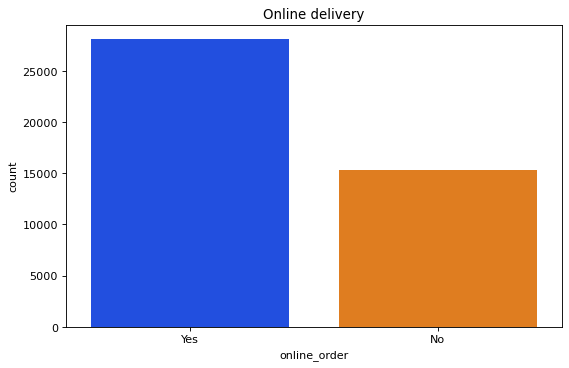

In [70]:
plt.figure(figsize=(8,5), dpi=80)
sns.countplot(x='online_order',data=zmt, palette='bright') # countplot gives us count of the values
plt.title("Online delivery")
plt.show()

By observing the graph, we can say that 25000+ restaurants are accepting online order for zomato and 15000 restaurants not accepting online orders.

### 2) Find best location by seeing dataset.

How can we find?

We have two columns 'rating' and 'votes' so by geeting the average of those columns with repect to 'location' we can find the best location.

In [71]:
zmt.head(1)

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


,rating
location,
BTM,15014.853733
Koramangala 5th Block,9413.322701
HSR,7719.215229
Indiranagar,7170.670976
JP Nagar,6769.861493


AxesSubplot(0.125,0.125;0.775x0.755)


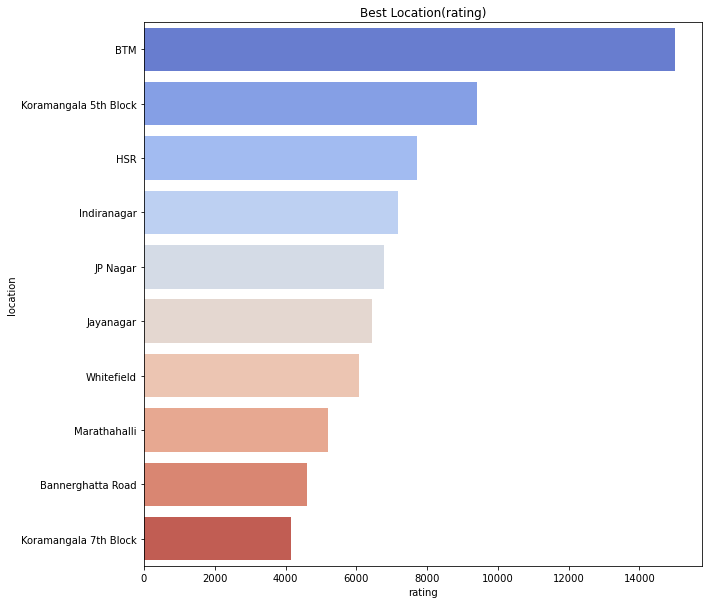

In [85]:
#Best location(ratings)
loc_rate=zmt.loc[:,['location','rating']]
loc_rate=zmt.groupby('location')['rating'].sum()
loc_rate=loc_rate.to_frame()
loc_rate=loc_rate.sort_values("rating",ascending=False)
display(loc_rate.head())
plt.figure(figsize=(10,10))
pt=sns.barplot(y=loc_rate.index[:10],x=loc_rate['rating'][:10],palette='coolwarm',orient='h')
plt.title('Best Location(rating)')
print(pt)

* Here we have plotted bar plot for the locations of restaurants in banglore in considaration with ratings.
* Graphs shows that the which location has more number of restaurants and which has the lowest.

Top 3 restaurants are:

1. BTM
2. Koramangla 5th block
3. HSR

,votes
location,
Koramangala 5th Block,2213339
Indiranagar,1159089
Koramangala 4th Block,685156
Church Street,585633
JP Nagar,578010


AxesSubplot(0.125,0.125;0.775x0.755)


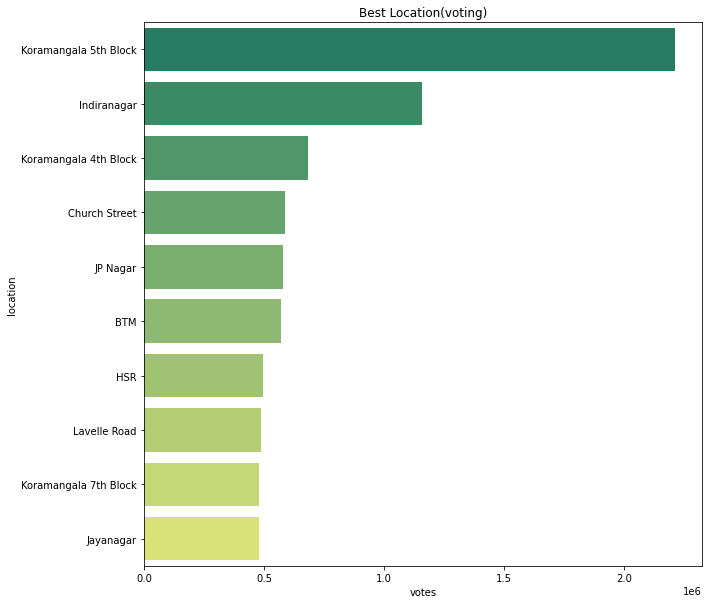

In [88]:
#Best location(votes)
loc_vote=zmt.loc[:,['location','votes']]
loc_vote=zmt.groupby('location')['votes'].sum()
loc_vote=loc_vote.to_frame()
loc_vote=loc_vote.sort_values("votes",ascending=False)
display(loc_vote.head())
plt.figure(figsize=(10,10))
pt=sns.barplot(y=loc_vote.index[:10],x=loc_vote['votes'][:10],palette='summer',orient='h')
plt.title('Best Location(voting)')
print(pt)

* Here we have plotted bar plot for the locations of restaurants in banglore in considaration with votes.
* Graphs shows that the which location has more number of restaurants and which has the lowest.

Top 3 restaurants are:

1. Koramangla 5th block
2. Indiranagarindiranagar
3. Koramangla 4th block

### 3) Find Types of restraunts and their count.

In [89]:
zmt.head(1)

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


,rest_type
Quick Bites,14951
Casual Dining,9840
Cafe,3483
Dessert Parlor,1921
Delivery,1773
"Takeaway, Delivery",1446
"Casual Dining, Bar",1111
Bakery,775
Beverage Shop,698
Bar,650


Text(0.5, 1.0, 'Restaurant Types')

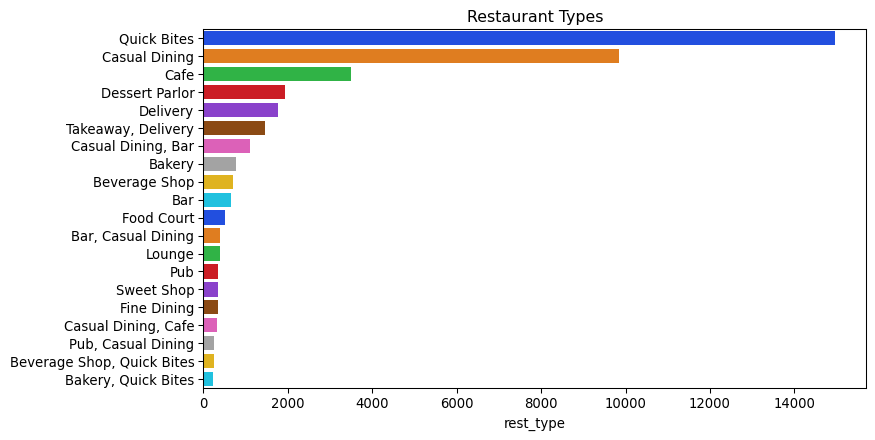

In [58]:
#Restaurant type
type1=zmt['rest_type'].value_counts().head(20)
display(type1.to_frame())
plt.figure(figsize=(9,5),dpi=95)
sns.barplot(x=type1,y= type1.index ,palette='bright')
plt.title('Restaurant Types')

In this graph it shows that the types of restaurants in Banglore and among all of them we have ploted first 20 restaurant types.

Here the top 3 restaurant types are:

* Quick Bites
* Casual Dining
* Cafe

### 4) Find Cost's of restaurants

In [90]:
zmt.head(1)

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


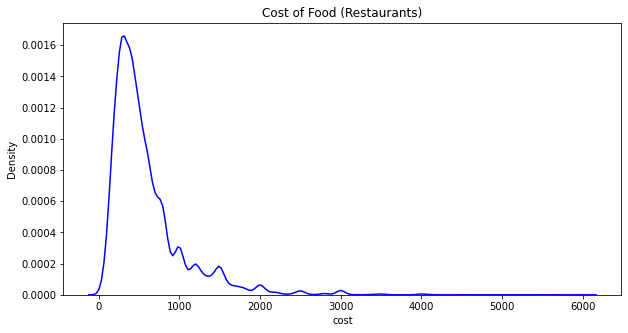

In [203]:
plt.figure(figsize=(10,5))
sns.kdeplot('cost',data=zmt, color="b")# KDE plot 
plt.title("Cost of Food (Restaurants)")
plt.show()

By observing above kde plot we can say that most of the restaurants have cost between Rs 1 to Rs 1000 for food and remaining have above Rs 1000 for their food.

### 4) Find count of restaurants have table boking facility.
Here, we can use countplot but try to drow pointplot to see how it looks like.

In [97]:
zmt.head(1)

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


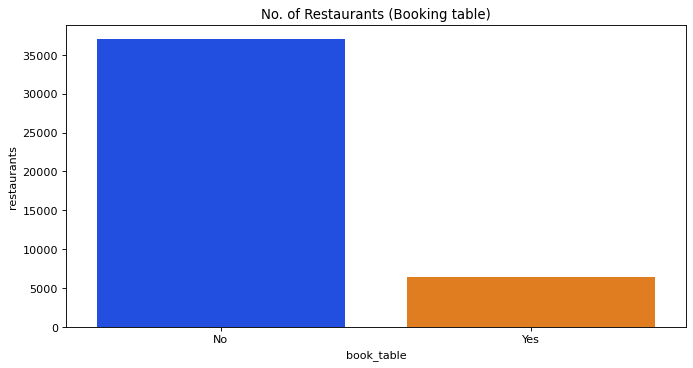

In [209]:
plt.figure(figsize=(10,5),dpi=80)
table_booking= zmt.groupby('book_table')['restaurants'].count().reset_index()
sns.barplot(x='book_table',y='restaurants',data=table_booking ,palette='bright')
plt.title('No. of Restaurants (Booking table)')
plt.show()

By seeing above pointplot we can say that only 7000 restaurants have table booking facility and 35000+ restaurants don't have facility of table booking.

### 5) Find number of restaurant at given location.

* BTM
* Basavanagudi
* West Bangalore
* Whitefield
* Yeshwantpur

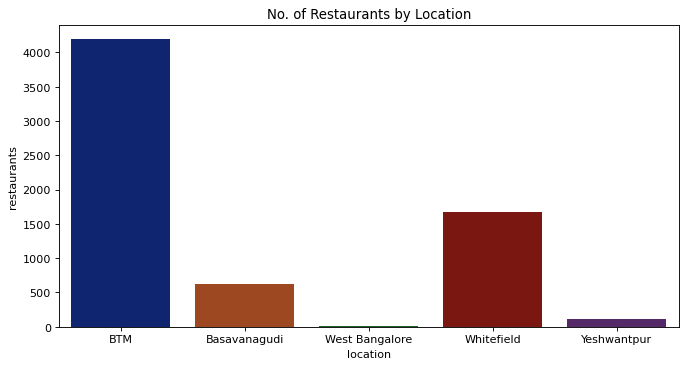

In [199]:
df=pd.DataFrame(zmt.groupby('location')['restaurants'].count()).reset_index()

# selecting given locations from dataset using isin()
criteria=df['location'].isin(['BTM','Basavanagudi','West Bangalore','Whitefield','Yeshwantpur']) 
plt.figure(figsize=(10,5), dpi=80) 
sns.barplot(x='location',y='restaurants',data=df[criteria], palette='dark')

plt.title("No. of Restaurants by Location")
plt.show()

By seeing given plot, we can notice that how many restaurants present are at given locations.

Ex:-

BTM location has 4000+ restaurants

### 6) Find most famous restaurants chains like Franchise (Rastaurants having more than one branch) in Bangalore.
We working on a zomato dataset of bangalore location so we can asume that all locations are belongs to bangalore.

* In this problem we need to find restaurant at each location having more than 1 branch and high rating.

In [113]:
zmt.head(1)

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


In [112]:
# getting location,restraunts and rating and their count of restaurants
df1=pd.DataFrame(zmt.groupby(['location','restaurants','rating']).count()).reset_index()
df1

,location,restaurants,rating,online_order,book_table,votes,rest_type,food_type,cost,type,city
0,BTM,100 C,3.7,3,3,3,3,3,3,3,3
1,BTM,2nd Home Restaurant,3.7,11,11,11,11,11,11,11,11
2,BTM,36th Cross Coffee Mane,3.7,1,1,1,1,1,1,1,1
3,BTM,"3B's - Buddies, Bar & Barbecues",4.4,13,13,13,13,13,13,13,13
4,BTM,A2B - Adyar Ananda Bhavan,3.8,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
11650,Yeshwantpur,The Cupcake Story,3.5,1,1,1,1,1,1,1,1
11651,Yeshwantpur,The Duke Of Juices,3.3,1,1,1,1,1,1,1,1
11652,Yeshwantpur,Tuckinto,3.8,2,2,2,2,2,2,2,2
11653,Yeshwantpur,Udupi Garden,3.0,2,2,2,2,2,2,2,2


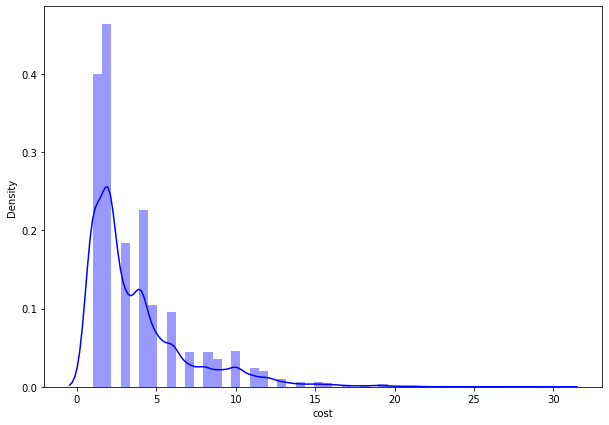

In [121]:
plt.figure(figsize=(10,7))
sns.distplot(df1['cost'], color= "b")
plt.show()

Note that all columns having some count values these are nothing but a count of that restaurant at given location.

* We can see some restaurants having 1 count and some having more than 1. 

* We want that restaurants which having more than 1 count and high rating.



In [122]:
chains_restaurants=df1[(df1['book_table']>1)]
famous_restaurants=pd.DataFrame(chains_restaurants.groupby('location')['restaurants','rating'].max()).reset_index()
famous_restaurants

,location,restaurants,rating
0,BTM,eat.fit,4.900000
1,Banashankari,Yo Roll Corner,4.600000
2,Banaswadi,Zam Zam Restaurant,4.000000
3,Bannerghatta Road,Zhangs Classic,4.600000
4,Basavanagudi,Zephyr,4.600000
...,...,...,...
84,West Bangalore,Garden City Mobile Biryani,3.702011
85,Whitefield,nu.tree,4.900000
86,Wilson Garden,Vijaya Sagar,4.000000
87,Yelahanka,Prashanth Naati Corner,3.900000


Finally, we got restaurant at each location has more that one branch and highest rating. Total 89 result we got. Let's try to plot only first 5 to get idea.

<Figure size 360x216 with 0 Axes>

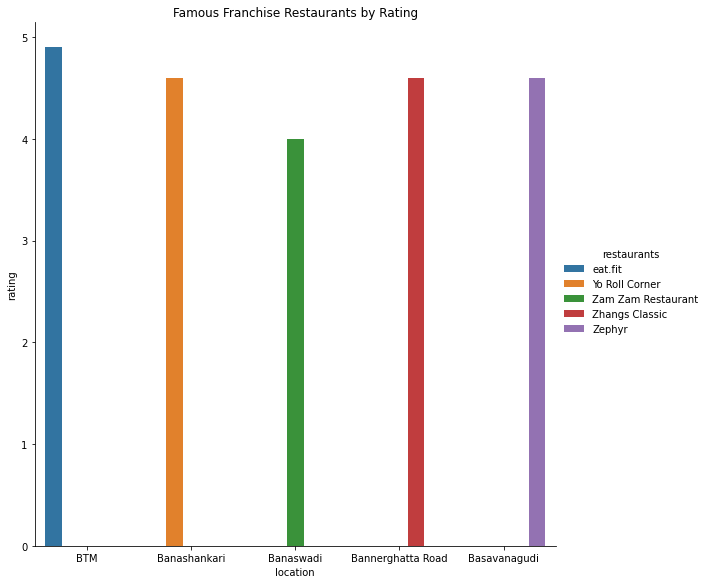

In [198]:
plt.figure(figsize=(5,3))
sns.catplot(x="location", y="rating", hue="restaurants",kind='bar', legend=True ,height=8,data=famous_restaurants.head(5))
plt.title("Famous Franchise Restaurants by Rating")
plt.show()

Here we can see that famous restaurant having more that one branch at location and their rating as well.

Ex.:

* We can say that, at BTM location in bangalore "eat.fit" restaurant is a famous restaurant franchise having maximum rating(4.9) compare to other restaurants franchise's at same location.

* At Banashankari location in bangalore "Yo Roll Corner" restaurant is a famous restaurant franchise having maximum rating(4.6) compare to other restaurants franchise's at same location.

* At Banaswadi location in bangalore "Zam Zam Restaurant" restaurant is a famous restaurant franchise having maximum rating(4.0) compare to other restaurants franchise's at same location. and so on...

### 7) Find how many voters gives rating for each 'type' and aggregate rating of that 'type'.

In [143]:
zmt.head(1)

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


<Figure size 720x360 with 0 Axes>

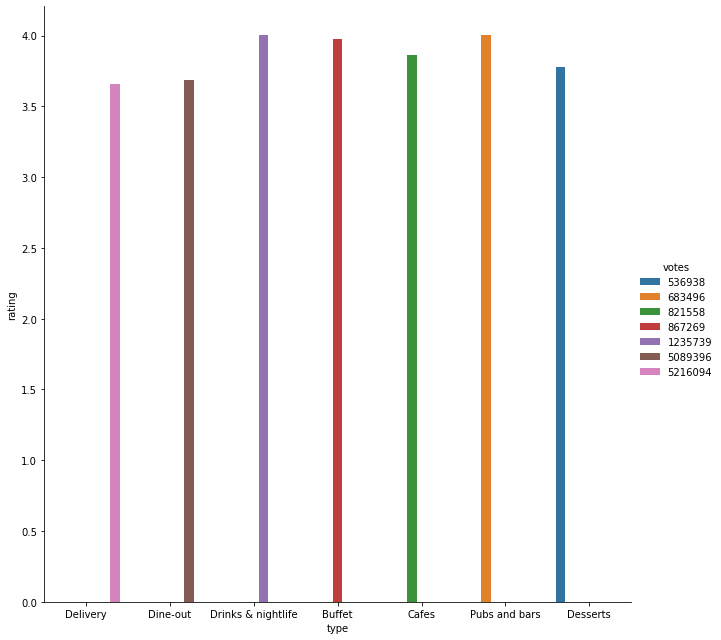

In [150]:
df2 = zmt.groupby('type').agg({'votes':'sum','rating':'mean'}).nlargest(7,['votes']).reset_index()

plt.figure(figsize=(10,5))
sns.catplot(x='type',y='rating',hue='votes',kind='bar',height=9, data=df2)

plt.title("")
plt.show()

Here we can see that, how many voters gives rating for each type and average rating of that type.

Ex:- Most of the voters(Total 5216094 voters) gives rating to the Delivery and its average rating is 3.7 and so on...

#### Note:
If we see delivery type has low rating but the number of voters is high. So it is ok to have a low rating because If one voter gives a rating to a product at that time we have the possibility that the product has a 5/5 rating. And if the number of voters is increasing then it is possible to get a low rating depending upon how many voters rated that product.

### 8) Gaussian Rest Type(Normal Distribution) of Rating.

In [151]:
zmt.head(1)

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


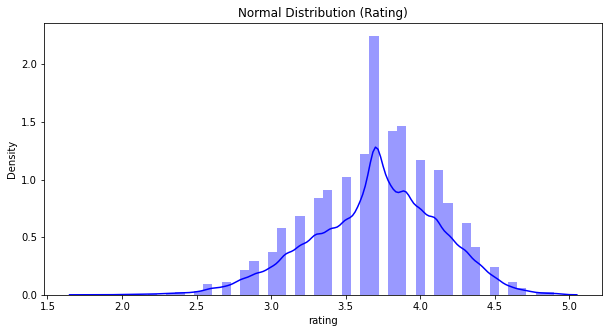

In [154]:
plt.figure(figsize=(10,5))
sns.distplot(zmt['rating'], color= "b")
plt.title("Normal Distribution (Rating)")
plt.show()

We got a normal distribution form of our rating and we observe that we have maximum ratings between 3.5 to 4.2

### 9) Find the how many Restaurants havign Chinese and North Indian food in their food type.

In [155]:
zmt.head(1)

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


In [156]:
# count of restaurants who serving chinese food.
Chinese= len([i for i in zmt['food_type'] if 'Chinese' in i])

# count of restaurants who serving North Indian food.
North_India= len([i for i in zmt['food_type'] if 'North India' in i]) 

#creating list
Restaurant_count=[Chinese,North_India]
Food_Type=['Chinese','North India']

#.set_index('Food_Type')# creating dataset of extracted data
df3 = pd.DataFrame({'Food_Type':Food_Type,'Restaurant_count':Restaurant_count})

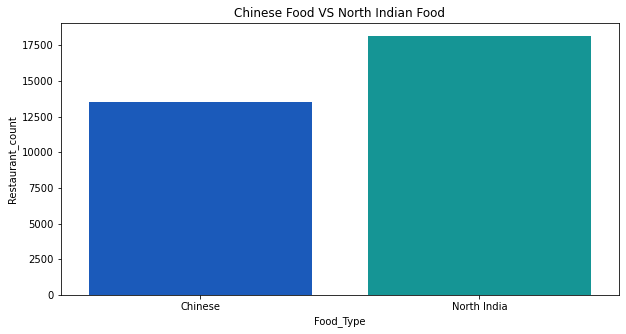

In [162]:
plt.figure(figsize=(10,5))

sns.barplot(x='Food_Type',y='Restaurant_count',data=df3, palette='winter')
plt.title("Chinese Food VS North Indian Food")
plt.show()

Here, We got actual count of restaurants who serving chinese and North Indian food.

### 10) Most famous restaurant chains in Bengaluru(No. of restaurants)

In [177]:
zmt.head(1)

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


,restaurants
Cafe Coffee Day,89
Onesta,85
Empire Restaurant,71
Five Star Chicken,68
Just Bake,68
Kanti Sweets,68
Petoo,64
Baskin Robbins,63
Pizza Hut,62
Polar Bear,61


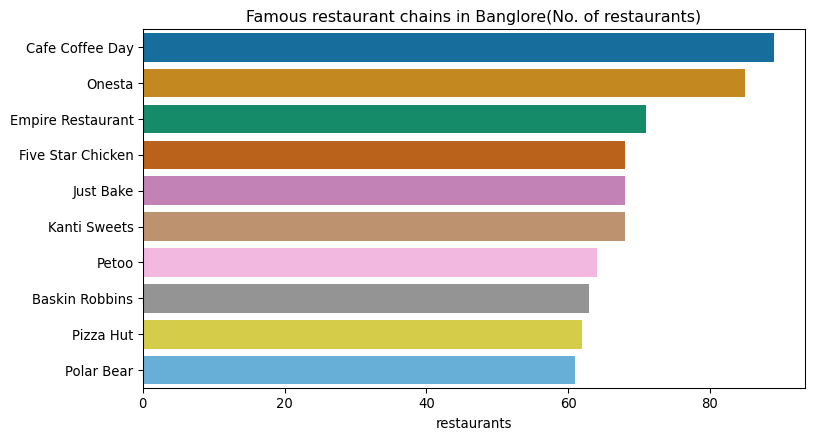

In [180]:
hotels=zmt['restaurants'].value_counts().head(10)
plt.figure(figsize=(9,5),dpi=95)
sns.barplot(y=hotels.index,x=hotels,orient='h',palette='colorblind')
plt.title('Famous restaurant chains in Banglore(No. of restaurants)')
display(hotels.to_frame())
plt.show()

Here the graph is according to the famous restaurants in banglore with respect to no of restaurants.

Top 3 are:-

1. Cafe Coffee Day
2. Onesta
3. Empire Restaurant

### 11) Find the most profitable type of restaurant.

In [169]:
zmt.head(1)

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


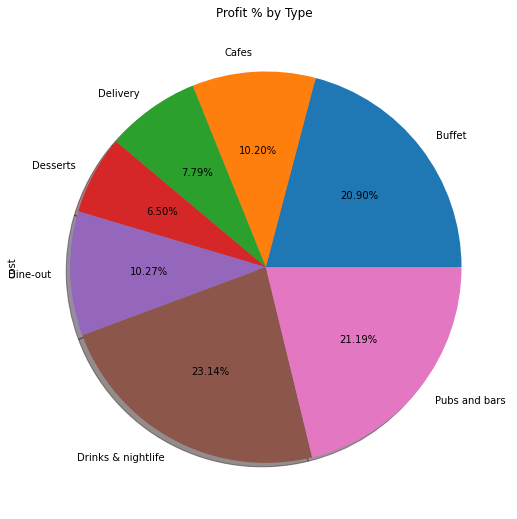

In [193]:
plt.figure(figsize=(10,5))

df4=zmt.groupby('type').agg({'cost':'mean'})
df4.cost.plot(kind='pie',autopct='%1.2f%%',figsize=(9,9), shadow=True)

plt.title("Profit % by Type ")
plt.show()


Here, we can see this by looking at the total percentage of the average cost. The restaurant has Drinks and Nightlife facilities at a 23% higher profit than other types.

### Summary:-
In the process of cleaning the dataset, I used the Pandas and Numpy libraries. Using pandas and NumPy I removed unwanted (useless) data and created new data frames and got useful data for my research. After cleaning my data I used seaborn and Matplotlib libraries to visualize and read my data. I have created questions regarding my research. I have tried to solve them by imagining and applying the conditions.